In [1]:
import keras
model=keras.models.load_model('best_model.h5')

In [8]:
import os
import numpy as np
import cv2 

In [11]:
# loading and pre-processing unlabelled images

datadir = './archive'
path = os.path.join(datadir,'pred_bt')
X_new = []
img_size = 150


for img in os.listdir(path):
    try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(img_size,img_size))
        X_new.append(new_array)
    except Exception as e:
        pass

X_new = np.array(X_new).reshape(-1,img_size,img_size,1)
X_new = X_new/255.0
print("Total unlabelled images ->",len(X_new))
print("Dimensions after pre-processing ->",X_new.shape)

Total unlabelled images -> 28
Dimensions after pre-processing -> (28, 150, 150, 1)


In [13]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 351ms/step


IndexError: index 28 is out of bounds for axis 0 with size 28

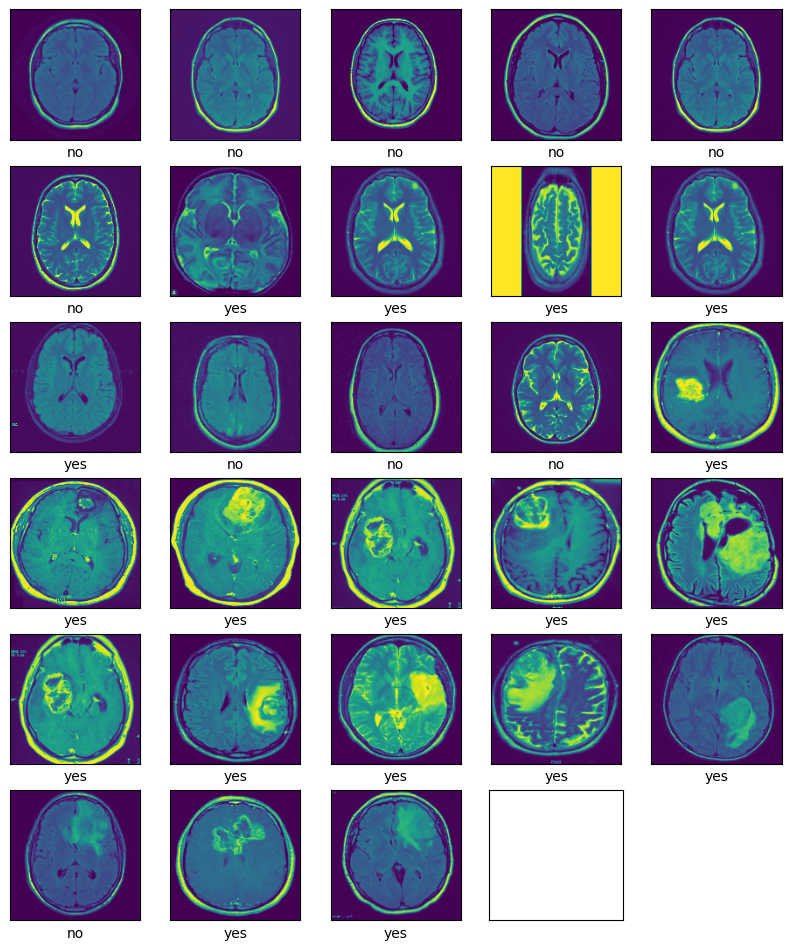

In [14]:
# making predictions

y_pred_new = model.predict(X_new)
y_pred_new = (y_pred_new >= 0.5).astype(int)

categories = ["yes","no"]

plt.figure(figsize=(10,24))
for i in range(60):
    plt.subplot(12,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_new[i])
    plt.xlabel(categories[y_pred_new[i][0]])